In [298]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import sc_AHM
from tblib import plotting
from tblib import superfluid as sf

reload(lattice)
reload(hamiltonian)
reload(sf)
reload(sc_AHM)

<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\sc_AHM.py'>

In [299]:
ham = hamiltonian.Model(N=2, kind='dDSL',T=0, delta=[1,1], ns=[0.5,0.5], nu=3, U=[4,4], mu=[-1,-1])
dels, nus, mus = sc_AHM.self_consistency_loop(ham, nk=21,HF=True, alpha=0.7, Nmin=10, Nmax=1200)

In [300]:
convsfw, term = sf.SFWconv(ham, nk=21, dk=1e-6)

In [301]:
convsfw

(0.09451110795433491+2.699082949325221e-46j)

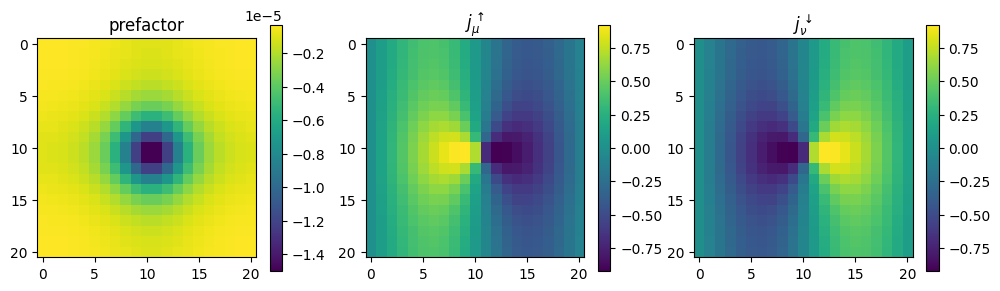

In [ ]:
ep = 2 # energy pair 
s=21
pfgrid = term[:,0,ep].reshape(s,s)
upcurr = term[:,1,ep].reshape(s,s)
downcurr = term[:,2,ep].reshape(s,s)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,16))
axes[0].set_title('prefactor')
axes[1].set_title(r'$j^{\uparrow}_{\mu}$')
axes[2].set_title(r'$j^{\downarrow}_{\nu}$')
ax0 = axes[0].imshow(np.real(pfgrid))
ax1 = axes[1].imshow(np.real(upcurr))
ax2 = axes[2].imshow(np.real(downcurr))
fig.colorbar(ax0, shrink=0.2)
fig.colorbar(ax1, shrink=0.2)
fig.colorbar(ax2, shrink=0.2)
plt.show()

In [ ]:
#10 values: 9min 
Us = np.linspace(1e-4, 10, 10)
convsfwlist = []
c = 0
for U in Us:
    ham = hamiltonian.Model(N=2, kind='dDSL',T=0, delta=[0.2,0.2], ns=[0.5,0.5], nu=3, U=[U,U], mu=[-0.6,-0.6])
    dels, nus, mus = sc_AHM.self_consistency_loop(ham, nk=21,HF=True, alpha=0.7, Nmin=10, Nmax=1200)
    convsfw, term = sf.SFWconv(ham, nk=21, dk=1e-6)
    convsfwlist.append(convsfw)
    if c%5==0:
        print(U)
    c+=1

0.0001
5.5556


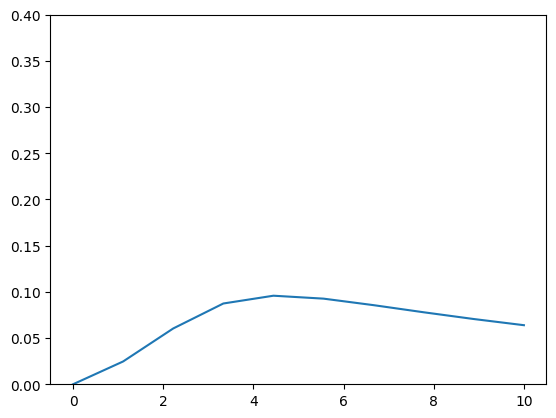

In [275]:
plt.ylim(0,0.4)
plt.plot(Us[:], np.abs(convsfwlist[:]))